--------------------------------------------------------------------------------
**Overview:**

This Google Colab notebook is designed to tackle the famous Titanic Machine Learning Challenge from Kaggle. The objective of this challenge is to predict the survival of passengers aboard the Titanic based on a variety of features, including age, gender, class, and more.

**Link** - https://www.kaggle.com/competitions/titanic

**Credit**:

Ionuț Vișan (Master student - Artificial Intelligence, UNSTP Bucharest)

**Contact**:

ionut.visan2604@gmail.com

https://www.linkedin.com/in/ionut-visan-721996221/

!! **For any information or clarification, do not hesitate to send me a message.**

--------------------------------------------------------------------------------
**Table of Contents**

1. Libraries
2. Files Upload and Data Visualization
3. Outliers Check for Age and Fare
4. Fare Statistics
5. Simple Imputation for Embarked and Fare
6. Encoding Sex and Embarked
7. Feature Correlation with Age
8. Iterative Imputation for Age
9. Feature Correlation
10. Feature Creation
11. Encoding Deck
12. Iterative Imputation for Deck
13. Feature Creation
14. Drop Features with Less Importance
15. Encoding Title, Deck, AgeBand, and FareBand
16. Feature Correlation
17. Normalization of Some Features
18. Extract RFE Features
19. Test Multiple Models
20. Verify Some Optimized Models
21. Check for Overfitting
22. Check for Folds Stability
23. Voting Classifier (Soft/Hard)
24. Stacking Classifier
25. Evaluation of the best obtained model
26. Training on the entire train set and predicting on the entire test set to obtain submission.csv
27. Saving the cleaned files
28. Saving the obtained model

--------------------------------------------------------------------------------

The best-performing model is: **Soft Voting Classifier**

With an accuracy of: **0.8827**

**Performance can be further improved over 0.9 through fine-tuning techniques. The obtained results are raw.**

I tried several approaches for this challenge:
1. Removing values that exceed certain percentiles (outliers) for Age/Fare + logarithmizing the values for Fare -> did not lead to better performance.
2. Creating new features based on the available ones and subsequently imputing missing values using a better correlation for Age and Deck -> did not lead to better performance.
3. Normalizing all attributes/some attributes before imputing for Age and Deck using KNeighborsRegressor -> did not lead to better performance.
4. Using a different estimator for IterativeImputer -> did not lead to better performance.
5. Using different hyperparameters for KNeighborsRegressor -> did not lead to better performance.
6. Adding new features: polynomial or that capture other relationships between attributes -> did not lead to better performance.
7. Using OneHotEncoder instead of LabelEncoder or specific mapping for a predefined dictionary -> did not lead to better performance.
8. Extracting the best attributes to be used in prediction in a different way (other than RFE) -> did not lead to better performance.
9. Using a different base model for RFE -> did not lead to better performance.
10. Extracting more/fewer attributes (with RFE) to be used in prediction -> did not lead to better performance.
11. Using other models/combinations of models (ensemble) -> did not lead to better performance.
12. I tried small-scale Grid Search and Bayesian Optimization to check if improvements can be made through quick searches -> did not lead to better performance.
13. Other improvement methods.

**Of course, I may have made some mistakes in the implementation or there may be improvements to my approach.**

**I would greatly appreciate it if you could improve this challenge and explain to me how I can increase my model's performance.**

--------------------------------------------------------------------------------
This code imports essential libraries and tools for data manipulation, preprocessing, model building, and evaluation in machine learning. It covers a wide range of functionalities, from basic operations and visualization to advanced machine learning models and statistical tests.

In [184]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Imputation
from google.colab import files
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Models
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
    StackingClassifier,
    HistGradientBoostingRegressor,
    GradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Advanced Models
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier

# Statistical Tests
from scipy.stats import chi2_contingency

# Model Evaluation and Selection
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Saving and loading models
import joblib

# Additional Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

--------------------------------------------------------------------------------
This code uploads the train.csv file from your local machine to the notebook environment for data processing.

In [ ]:
# Upload train.csv file
uploaded = files.upload()

Saving train.csv to train.csv


--------------------------------------------------------------------------------
This code reads the train.csv file into a DataFrame, displays basic information, summary statistics, and descriptions of categorical features.

In [185]:
# Read data from file
train = pd.read_csv('train.csv')

# Show info about the file
train.info()
print()
print(train.describe())
print()
print(train.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592   

--------------------------------------------------------------------------------
This code uploads the test.csv file from your local machine to the notebook environment for data processing.

In [ ]:
# Upload test.csv file
uploaded = files.upload()

Saving test.csv to test.csv


--------------------------------------------------------------------------------
This code reads the test.csv file into a DataFrame, displays basic information, summary statistics, and descriptions of categorical features.

In [186]:
# Read data from file
test = pd.read_csv('test.csv')

# Show info about the file
test.info()
print()
print(test.describe())
print()
print(test.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.

--------------------------------------------------------------------------------
This code generates and displays boxplots for the 'Age' and 'Fare' features in both the train and test datasets, providing visual insights into their distributions and potential outliers.

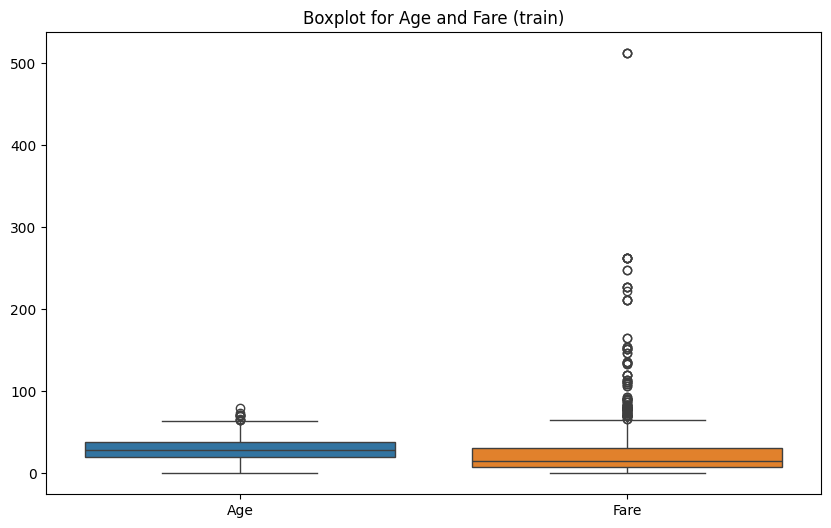

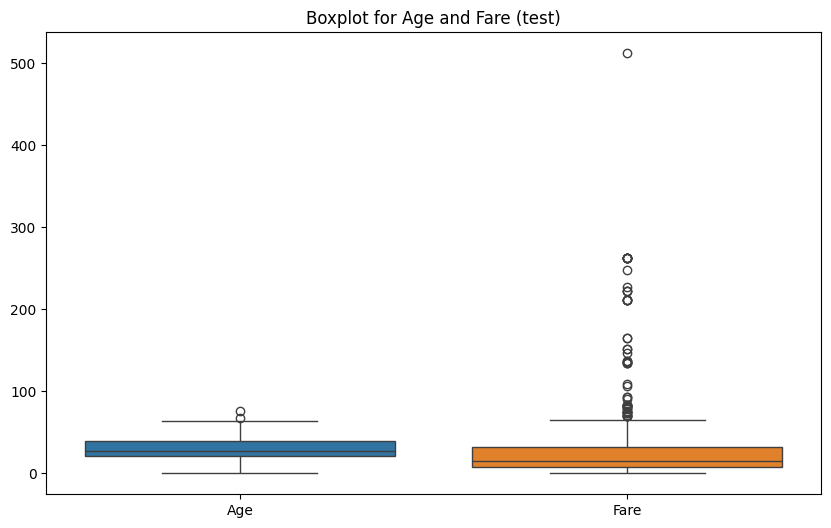

In [187]:
# Boxplot for 'Age' and 'Fare' in the train dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=train[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare (train)")
plt.show()

# Boxplot for 'Age' and 'Fare' in the test dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=test[['Age', 'Fare']])
plt.title("Boxplot for Age and Fare (test)")
plt.show()

--------------------------------------------------------------------------------
This code outputs summary statistics for the 'Fare' feature in both the train and test datasets, providing key insights such as mean, standard deviation, minimum, and maximum values.

In [188]:
# Display summary statistics for 'Fare' in the train dataset
print(train['Fare'].describe())
print()

# Display summary statistics for 'Fare' in the test dataset
print(test['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


--------------------------------------------------------------------------------
This code uses a SimpleImputer to fill missing values in the 'Embarked' column of the train and test datasets with the most frequent value, and in the 'Fare' column of the test dataset. It then checks for any remaining missing values after the imputation process.

In [189]:
# Creating a SimpleImputer to fill missing values in the 'Embarked' column
imputer = SimpleImputer(strategy='most_frequent')

# Applying the imputer on the 'Embarked' column in the train and test datasets
train['Embarked'] = imputer.fit_transform(train[['Embarked']]).ravel()
test['Embarked'] = imputer.fit_transform(test[['Embarked']]).ravel()

# Applying the imputer on the 'Fare' column in the test dataset
test['Fare'] = imputer.fit_transform(test[['Fare']]).ravel()

# Checking for any remaining missing values after imputation
print(train[['Embarked']].isnull().sum())
print(test[['Embarked']].isnull().sum())
print(test[['Fare']].isnull().sum())

Embarked    0
dtype: int64
Embarked    0
dtype: int64
Fare    0
dtype: int64


--------------------------------------------------------------------------------
This code converts the 'Sex' and 'Embarked' columns in both the train and test datasets from categorical to numerical values, with 'Sex' being mapped to 0 for male and 1 for female, and 'Embarked' being mapped to 0 for 'S', 1 for 'C', and 2 for 'Q'.

In [190]:
# Convert 'Sex' and 'Embarked' columns in the train dataset to numerical values
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Convert 'Sex' and 'Embarked' columns in the test dataset to numerical values
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

--------------------------------------------------------------------------------
This code calculates the correlation between the 'Age' feature and other selected features ('Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked') in the train dataset, and then sorts these correlations in descending order to identify which features are most strongly related to 'Age'.

In [191]:
# Selecting features for correlation calculation
features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

# Adding 'Age' to the list of features
correlation_data = train[features + ['Age']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Extracting correlations with 'Age' and sorting in descending order
age_correlation = correlation_matrix['Age'].abs().sort_values(ascending=False)
print(age_correlation)

Age         1.000000
Pclass      0.369226
SibSp       0.308247
Parch       0.189119
Fare        0.096067
Sex         0.093254
Embarked    0.010171
Name: Age, dtype: float64


--------------------------------------------------------------------------------
This code imputes missing 'Age' values in the train dataset using IterativeImputer with KNeighborsRegressor, updates the dataset, and then compares the distributions of the original and imputed 'Age' values through summary statistics and visualizations.

Distribution of initial 'Age' values (including NaN):
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age_initial, dtype: float64

Distribution of imputed 'Age' values:
count    891.000000
mean      29.991850
std       13.569087
min        0.420000
25%       21.100000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


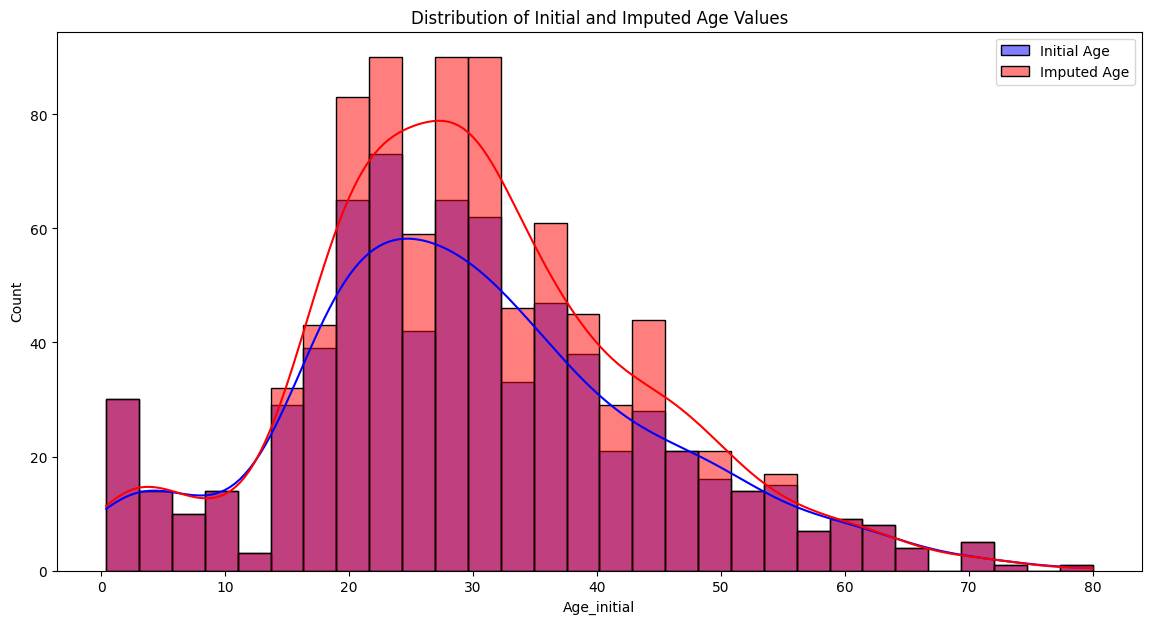

In [192]:
# Selecting relevant features for imputation
features_for_imputation = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

# Creating a subset of data with the relevant features for imputation
impute_data = train[features_for_imputation]

# Keeping a copy of the initial values of 'Age'
train['Age_initial'] = train['Age']

# Applying IterativeImputer using KNeighborsRegressor and setting bounds
iter_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=100, random_state=42)
imputed_data = iter_imputer.fit_transform(impute_data)

# Transferring imputed 'Age' values back to the original dataset, with lower bounds set
imputed_ages = imputed_data[:, 0]
imputed_ages = np.clip(imputed_ages, 0, None)  # Set lower bounds to 0

# Updating 'Age' in the train dataset only where it was NaN
train.loc[train['Age'].isna(), 'Age'] = imputed_ages[train['Age'].isna()]

# Checking the distribution of initial and imputed 'Age' values
print("Distribution of initial 'Age' values (including NaN):")
print(train['Age_initial'].describe())

print("\nDistribution of imputed 'Age' values:")
print(train['Age'].describe())

# Visualizing the distribution of initial and imputed 'Age' values
plt.figure(figsize=(14, 7))
sns.histplot(train['Age_initial'], kde=True, color='blue', label='Initial Age', bins=30)
sns.histplot(train['Age'], kde=True, color='red', label='Imputed Age', bins=30)
plt.legend()
plt.title('Distribution of Initial and Imputed Age Values')
plt.show()

--------------------------------------------------------------------------------
This code imputes missing 'Age' values in the test dataset using IterativeImputer with KNeighborsRegressor, updates the dataset, and then compares the distributions of the original and imputed 'Age' values through summary statistics and visualizations.

Distribution of initial 'Age' values (including NaN):
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age_initial, dtype: float64

Distribution of imputed 'Age' values:
count    418.000000
mean      29.697129
std       12.964948
min        0.170000
25%       22.000000
50%       27.000000
75%       36.575000
max       76.000000
Name: Age, dtype: float64


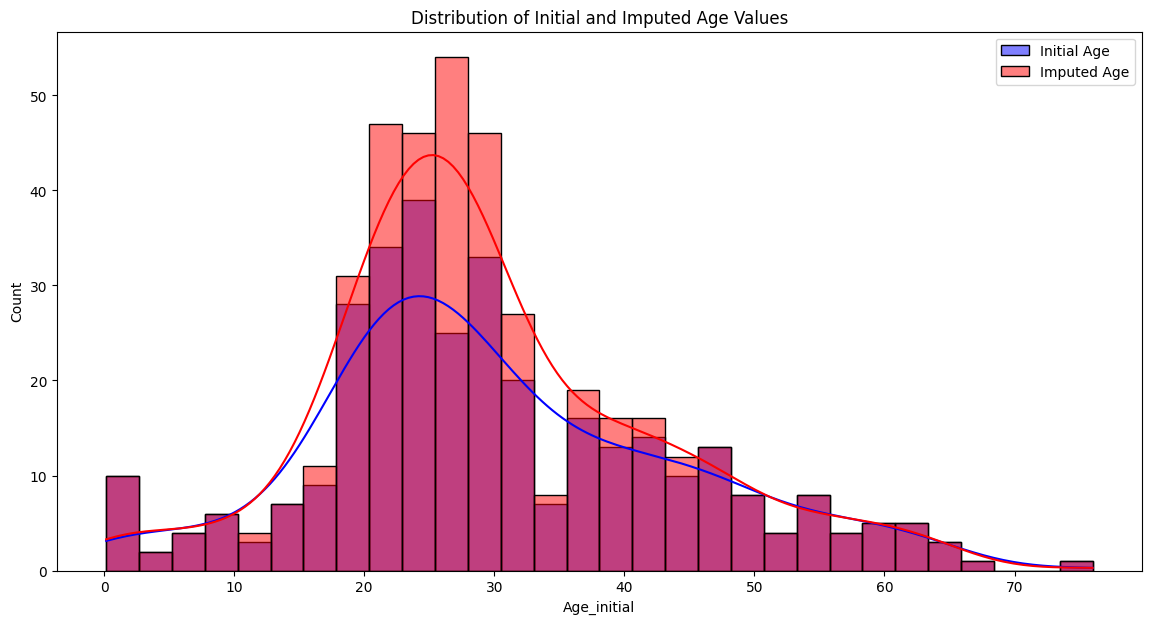

In [193]:
# Selecting relevant features for imputation
features_for_imputation = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

# Creating a subset of data with the relevant features for imputation
impute_data = test[features_for_imputation]

# Keeping a copy of the initial values of 'Age'
test['Age_initial'] = test['Age']

# Applying IterativeImputer using RandomForestRegressor and setting bounds
iter_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=100, random_state=42)
imputed_data = iter_imputer.fit_transform(impute_data)

# Transferring imputed 'Age' values back to the original dataset, with lower bounds set
imputed_ages = imputed_data[:, 0]
imputed_ages = np.clip(imputed_ages, 0, None)  # Set lower bounds to 0

# Updating 'Age' in the test dataset only where it was NaN
test.loc[test['Age'].isna(), 'Age'] = imputed_ages[test['Age'].isna()]

# Checking the distribution of initial and imputed 'Age' values
print("Distribution of initial 'Age' values (including NaN):")
print(test['Age_initial'].describe())

print("\nDistribution of imputed 'Age' values:")
print(test['Age'].describe())

# Visualizing the distribution of initial and imputed 'Age' values
plt.figure(figsize=(14, 7))
sns.histplot(test['Age_initial'], kde=True, color='blue', label='Initial Age', bins=30)
sns.histplot(test['Age'], kde=True, color='red', label='Imputed Age', bins=30)
plt.legend()
plt.title('Distribution of Initial and Imputed Age Values')
plt.show()

--------------------------------------------------------------------------------
This code performs Chi-Square tests to determine the association between various categorical features and survival ('Survived') in the train dataset. It stores the results, sorts them by p-value, and interprets whether each feature has a significant relationship with survival based on the p-value threshold of 0.05.

In [194]:
# Defining categorical features
categorical_features = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Storing the results of Chi-Square tests
chi_square_results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(train[feature], train['Survived'])  # Creating a contingency table
    chi2, p, dof, ex = chi2_contingency(contingency_table)  # Performing Chi-Square test
    chi_square_results.append((feature, chi2, p))  # Storing the feature name, Chi2 value, and p-value

# Creating a DataFrame to store the results
chi_square_df = pd.DataFrame(chi_square_results, columns=['Feature', 'Chi2', 'p-value'])

# Sorting the DataFrame by p-value in descending order
chi_square_df = chi_square_df.sort_values(by='p-value', ascending=False)

# Printing the Chi-Square test results
print(chi_square_df)

# Interpreting the results
for index, row in chi_square_df.iterrows():
    if row['p-value'] < 0.05:
        print(f"There is a significant association between '{row['Feature']}' and 'Survived'.")
    else:
        print(f"There is NO significant association between '{row['Feature']}' and 'Survived'.")

        Feature        Chi2       p-value
0   PassengerId  891.000000  4.842482e-01
2          Name  891.000000  4.842482e-01
9         Cabin  161.250000  1.835735e-01
7        Ticket  766.569703  1.152730e-02
6         Parch   27.925784  9.703526e-05
4           Age  230.227610  1.077741e-05
10     Embarked   25.964453  2.300863e-06
5         SibSp   37.271793  1.558581e-06
8          Fare  425.808381  1.164764e-11
1        Pclass  102.888989  4.549252e-23
3           Sex  260.717020  1.197357e-58
There is NO significant association between 'PassengerId' and 'Survived'.
There is NO significant association between 'Name' and 'Survived'.
There is NO significant association between 'Cabin' and 'Survived'.
There is a significant association between 'Ticket' and 'Survived'.
There is a significant association between 'Parch' and 'Survived'.
There is a significant association between 'Age' and 'Survived'.
There is a significant association between 'Embarked' and 'Survived'.
There is a signif

--------------------------------------------------------------------------------
This code performs several feature engineering tasks on the train and test datasets to enhance the predictive power of the model:

- Cleanup: Drops the Age_initial column and rounds the Age values to one decimal place.

- Title Extraction: Extracts titles (e.g., Mr, Mrs) from the Name column and consolidates rare titles under a single label, Rare.

- Family Features: Creates FamilySize to represent the total family members on board and IsAlone to indicate whether a passenger is alone.

- Fare Adjustments: Computes FarePerPerson by dividing Fare by FamilySize.

- Deck Extraction: Extracts the deck information from the Cabin column.

- Interaction Features: Creates interaction features Age*Class and Age*Fare to capture relationships between Age and other variables.

- Age Binning: Creates AgeBand, which bins Age into five equal-sized intervals.

These transformations enhance the dataset by adding new, potentially informative features that could improve the model's performance.

In [195]:
# Dropping the 'Age_initial' column as it's no longer needed
train = train.drop('Age_initial', axis=1)
test = test.drop('Age_initial', axis=1)

# Rounding the 'Age' values to one decimal place
train['Age'] = train['Age'].round(1)
test['Age'] = test['Age'].round(1)

# Extracting 'Title' from the 'Name' column (e.g., Mr, Mrs, Miss, etc.)
train['Title'] = train['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
test['Title'] = test['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

# Replacing rare titles with the label 'Rare'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')

# Creating 'FamilySize' feature as the sum of 'SibSp' (siblings/spouses) and 'Parch' (parents/children) plus 1 (for the individual)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Creating 'IsAlone' feature: 1 if the passenger is alone, 0 otherwise
train['IsAlone'] = 0  # Initially set to 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1  # Set to 1 if FamilySize is 1

test['IsAlone'] = 0  # Initially set to 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1  # Set to 1 if FamilySize is 1

# Creating 'FarePerPerson' feature by dividing the 'Fare' by 'FamilySize'
train['FarePerPerson'] = train['Fare'] / train['FamilySize']
test['FarePerPerson'] = test['Fare'] / test['FamilySize']

# Extracting the 'Deck' from the 'Cabin' column (first letter of the cabin number) or assigning NaN if 'Cabin' is missing
train['Deck'] = train['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)
test['Deck'] = test['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)

# Creating 'Age*Class' feature by multiplying 'Age' by 'Pclass'
train['Age*Class'] = train['Age'] * train['Pclass']
test['Age*Class'] = test['Age'] * test['Pclass']

# Creating 'Age*Fare' feature by multiplying 'Age' by 'Fare'
train['Age*Fare'] = train['Age'] * train['Fare']
test['Age*Fare'] = test['Age'] * test['Fare']

# Creating 'AgeBand' feature by binning 'Age' into 5 equal-sized intervals
train['AgeBand'] = pd.cut(train['Age'], 5)
test['AgeBand'] = pd.cut(test['Age'], 5)

--------------------------------------------------------------------------------
This code extracts and prints the unique values present in the 'Deck' column of the train dataset, allowing you to see the distinct deck identifiers or any missing values (e.g., NaN) in the dataset.

In [196]:
# Extract and print the unique values in the 'Deck' column of the train dataset
unique_values = train['Deck'].unique()
print(unique_values)

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


--------------------------------------------------------------------------------
This code creates a dictionary to map deck letters to numerical values and then applies this mapping to the 'Deck' column in both the train and test datasets, converting the deck identifiers from categorical letters to numerical values for easier analysis and modeling.

In [197]:
# Create a mapping dictionary to convert deck letters to numerical values
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}

# Map the 'Deck' column in the train/test dataset using the deck_mapping dictionary
train['Deck'] = train['Deck'].map(deck_mapping)
test['Deck'] = test['Deck'].map(deck_mapping)

--------------------------------------------------------------------------------
This code imputes missing 'Deck' values in the train dataset using IterativeImputer with a KNeighborsRegressor. It maps the imputed numerical values back to their corresponding deck letters, checks the distribution of the imputed 'Deck' values, and visualizes this distribution to ensure that the imputation process has been applied correctly and meaningfully.

Distribution of imputed 'Deck' values:
Deck
E    330
F    194
D    144
C    143
B     60
A     15
G      4
T      1
Name: count, dtype: int64


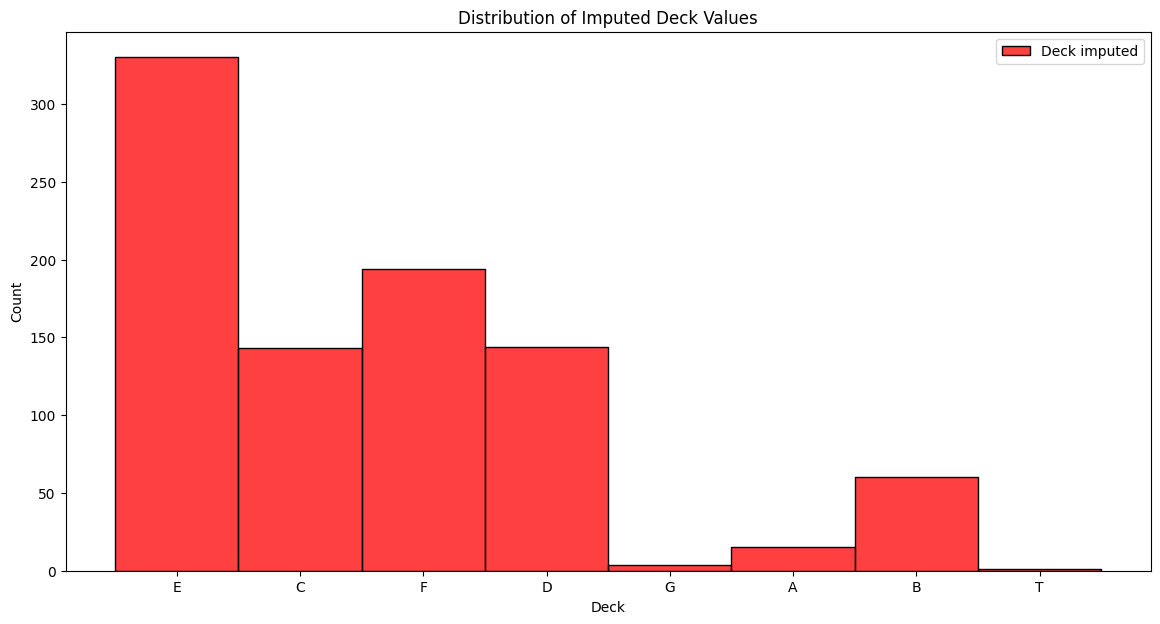

In [198]:
# Selecting relevant features for imputation
features_for_imputation = ['Pclass', 'Fare', 'Embarked', 'Sex', 'Age', 'Deck']
impute_data = train[features_for_imputation]

# Applying IterativeImputer using LinearRegression for imputation
iter_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=1000, random_state=42)
imputed_data = iter_imputer.fit_transform(impute_data)

# Transferring the imputed 'Deck' values back to the original train dataset
train['Deck'] = imputed_data[:, features_for_imputation.index('Deck')].round().astype(int)

# Reconverting numerical deck values back to letters (optional step)
reverse_deck_mapping = {v: k for k, v in deck_mapping.items()}
train['Deck'] = train['Deck'].map(reverse_deck_mapping)

# Checking the distribution of imputed 'Deck' values
print("Distribution of imputed 'Deck' values:")
print(train['Deck'].value_counts())

# Visualizing the distribution of imputed 'Deck' values
plt.figure(figsize=(14, 7))
sns.histplot(train['Deck'], kde=False, color='red', label='Deck imputed', bins=30)
plt.legend()
plt.title('Distribution of Imputed Deck Values')
plt.show()

--------------------------------------------------------------------------------
This code imputes missing 'Deck' values in the test dataset using IterativeImputer with a KNeighborsRegressor. It maps the imputed numerical values back to their corresponding deck letters, checks the distribution of the imputed 'Deck' values, and visualizes this distribution to ensure that the imputation process has been applied correctly and meaningfully.

Distribution of imputed 'Deck' values:
Deck
F    207
C     80
D     49
B     41
E     33
A      7
G      1
Name: count, dtype: int64


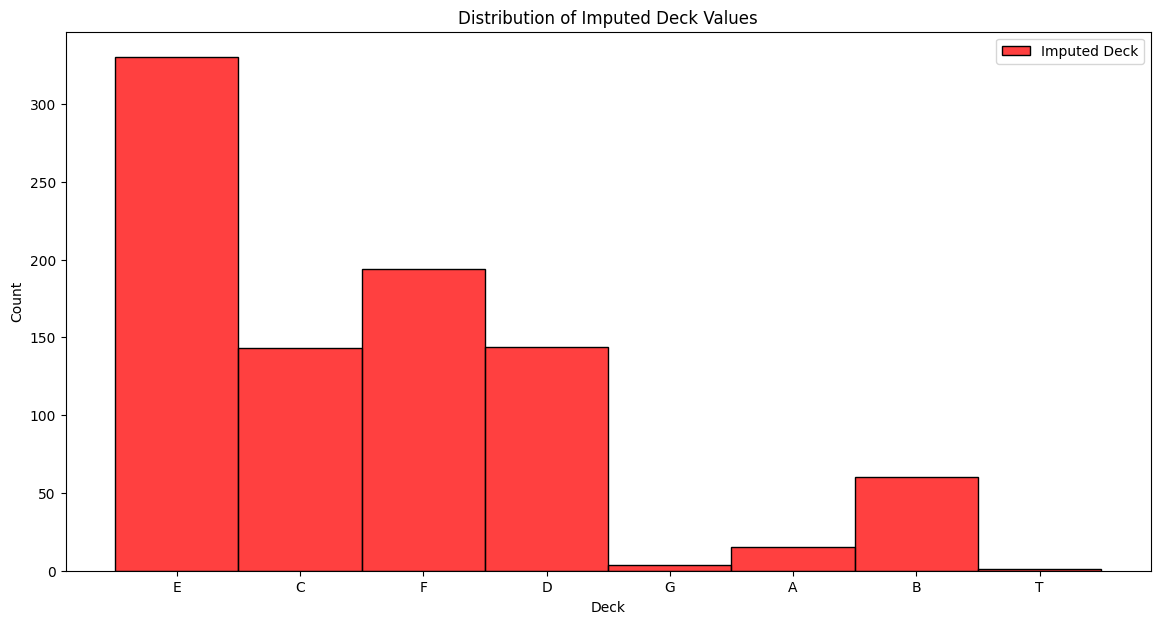

In [199]:
# Selecting relevant features for imputation
features_for_imputation = ['Pclass', 'Fare', 'Embarked', 'Sex', 'Age', 'Deck']
impute_data = test[features_for_imputation]

# Applying IterativeImputer with KNeighborsRegressor to fill missing values
iter_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=1000, random_state=42)
imputed_data = iter_imputer.fit_transform(impute_data)

# Transferring the imputed 'Deck' values back to the original test dataset
test['Deck'] = imputed_data[:, features_for_imputation.index('Deck')].round().astype(int)

# Reverting numeric deck values back to letters (optional step)
reverse_deck_mapping = {v: k for k, v in deck_mapping.items()}
test['Deck'] = test['Deck'].map(reverse_deck_mapping)

# Checking the distribution of imputed 'Deck' values
print("Distribution of imputed 'Deck' values:")
print(test['Deck'].value_counts())

# Visualizing the distribution of imputed 'Deck' values
plt.figure(figsize=(14, 7))
sns.histplot(train['Deck'], kde=False, color='red', label='Imputed Deck', bins=30)
plt.legend()
plt.title('Distribution of Imputed Deck Values')
plt.show()

--------------------------------------------------------------------------------
- Avoid Zero Values in 'Fare': Small value added to 'Fare' to avoid issues with zero values when binning.

- Create 'FareBand': Divides 'Fare' into four quartiles for categorization.

- Create 'Child' Feature: Flags passengers under 18 as children.

- Create 'Mother' Feature: Identifies female passengers over 18 with children and the title 'Mrs' as mothers.

- Create 'CabinBool' Feature: Flags passengers with a cabin number.

- Create 'TicketFreq' Feature: Counts the frequency of each ticket number in the dataset.

- Create 'InGroup' Feature: Flags passengers traveling with family or having a shared ticket as being in a group.

In [200]:
# Adding a small value to 'Fare' to avoid issues with zero values when creating bins
train['Fare'] = train['Fare'] + 0.001
test['Fare'] = test['Fare'] + 0.001

# Creating 'FareBand' by dividing 'Fare' into four equal-sized bins (quartiles)
train['FareBand'] = pd.qcut(train['Fare'], 4)
test['FareBand'] = pd.qcut(test['Fare'], 4)

# Creating 'Child' feature: 1 if the passenger is under 18, 0 otherwise
train['Child'] = (train['Age'] < 18).astype(int)
test['Child'] = (test['Age'] < 18).astype(int)

# Creating 'Mother' feature: 1 if the passenger is a female (Sex=1), over 18, has children (Parch > 0), and the title is 'Mrs'
train['Mother'] = ((train['Sex'] == 1) & (train['Age'] > 18) & (train['Parch'] > 0) & (train['Title'] == 'Mrs')).astype(int)
test['Mother'] = ((test['Sex'] == 1) & (test['Age'] > 18) & (test['Parch'] > 0) & (test['Title'] == 'Mrs')).astype(int)

# Creating 'CabinBool' feature: 1 if the passenger has a cabin number, 0 otherwise
train['CabinBool'] = train['Cabin'].notnull().astype(int)
test['CabinBool'] = test['Cabin'].notnull().astype(int)

# Creating 'TicketFreq' feature that counts the frequency of each ticket number in the dataset
train['TicketFreq'] = train.groupby('Ticket')['Ticket'].transform('count')
test['TicketFreq'] = test.groupby('Ticket')['Ticket'].transform('count')

# Creating 'InGroup' feature: 1 if the passenger is traveling with family (SibSp + Parch > 0) or has a shared ticket (TicketFreq > 1), 0 otherwise
train['InGroup'] = ((train['SibSp'] + train['Parch'] > 0) | (train['TicketFreq'] > 1)).astype(int)
test['InGroup'] = ((test['SibSp'] + test['Parch'] > 0) | (test['TicketFreq'] > 1)).astype(int)

--------------------------------------------------------------------------------
Removes the 'PassengerId', 'Ticket', 'Cabin', and 'Name' columns from both the train and test datasets.

In [201]:
# Specify the columns to be dropped
columns_to_drop_train = ['PassengerId', 'Ticket', 'Cabin', 'Name']
columns_to_drop_test = ['Ticket', 'Cabin', 'Name']

# Drop the specified columns from the train dataset
train = train.drop(columns=columns_to_drop_train)

# Drop the specified columns from the test dataset
test = test.drop(columns=columns_to_drop_test)

--------------------------------------------------------------------------------
Converts categorical features 'Title', 'Deck', 'AgeBand', and 'FareBand' into numerical values for both train and test datasets using LabelEncoder.

In [202]:
# Label Encoding for 'Title'
label_encoder_title = LabelEncoder()
train['Title'] = label_encoder_title.fit_transform(train['Title'])
test['Title'] = label_encoder_title.fit_transform(test['Title'])

# Label Encoding for 'Deck'
label_encoder_deck = LabelEncoder()
train['Deck'] = label_encoder_deck.fit_transform(train['Deck'])
test['Deck'] = label_encoder_deck.fit_transform(test['Deck'])

# Label Encoding for 'AgeBand'
label_encoder_ageband = LabelEncoder()
train['AgeBand'] = label_encoder_ageband.fit_transform(train['AgeBand'])
test['AgeBand'] = label_encoder_ageband.fit_transform(test['AgeBand'])

# Label Encoding for 'FareBand'
label_encoder_fareband = LabelEncoder()
train['FareBand'] = label_encoder_fareband.fit_transform(train['FareBand'])
test['FareBand'] = label_encoder_fareband.fit_transform(test['FareBand'])

--------------------------------------------------------------------------------
Computes and sorts the absolute correlation values of all numerical variables with the 'Survived' variable, providing insights into which features have the strongest relationship with survival.

In [203]:
# Calculate the correlation matrix for all numerical variables
correlation_matrix = train.corr()

# Select the correlation values for the 'Survived' variable
correlation_with_survived = correlation_matrix['Survived']

# Sort the correlation values in descending order, excluding 'Survived' itself
correlation_with_survived_sorted = correlation_with_survived.drop('Survived').abs().sort_values(ascending=False)

# Display the sorted correlation values
print(correlation_with_survived_sorted)

Sex              0.543351
Age*Class        0.355694
Pclass           0.338481
CabinBool        0.316912
FareBand         0.299357
Fare             0.257307
InGroup          0.241717
FarePerPerson    0.221600
Title            0.220621
Age*Fare         0.219385
IsAlone          0.203367
Mother           0.167063
Child            0.134174
Deck             0.110438
Embarked         0.106811
Age              0.093245
Parch            0.081629
AgeBand          0.068268
TicketFreq       0.038247
SibSp            0.035322
FamilySize       0.016639
Name: Survived, dtype: float64


--------------------------------------------------------------------------------
Creates a duplicate of the train dataset to preserve the original data for any future reference or modifications.

In [204]:
# Create a copy of the train/test dataset to preserve the original data
train_copy = train.copy()
test_copy = test.copy()

--------------------------------------------------------------------------------
Applies Min-Max scaling to the specified columns in train_copy to normalize their values within a range of 0 to 1, and displays the first few rows to verify the results.

In [205]:
# Select the columns you want to standardize
attributes_to_standardize = ['Age', 'Fare', 'FarePerPerson', 'Age*Class', 'Age*Fare']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Apply standardization only on the selected columns
train_copy[attributes_to_standardize] = scaler.fit_transform(train_copy[attributes_to_standardize])
test_copy[attributes_to_standardize] = scaler.fit_transform(test_copy[attributes_to_standardize])


# Check the result of the standardization by printing the first few rows of the standardized columns
print(train_copy[attributes_to_standardize].head())
print()
print(test_copy[attributes_to_standardize].head())

        Age      Fare  FarePerPerson  Age*Class  Age*Fare
0  0.271357  0.014151       0.007076   0.294437  0.008648
1  0.472362  0.139136       0.069568   0.167797  0.146865
2  0.321608  0.015469       0.015469   0.348711  0.011172
3  0.434673  0.103644       0.051822   0.154229  0.100765
4  0.434673  0.015713       0.015713   0.470828  0.015276

        Age      Fare  FarePerPerson  Age*Class  Age*Fare
0  0.452507  0.015282       0.029840   0.568823  0.009090
1  0.617414  0.013663       0.013340   0.776119  0.011072
2  0.815303  0.018909       0.036922   0.682145  0.020213
3  0.353562  0.016908       0.033016   0.444444  0.007871
4  0.287599  0.023984       0.015611   0.361526  0.009097


--------------------------------------------------------------------------------
Uses Recursive Feature Elimination (RFE) with a GradientBoostingClassifier to identify and select the top 15 features from X_train. Updates the training and testing datasets to include only these selected features.

In [206]:
# Separating the predictor variables (features) from the target variable (Survived)
X = train_copy.drop('Survived', axis=1)
y = train_copy['Survived']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model for RFE
base_model_for_rfe = GradientBoostingClassifier(random_state=42)

# Create the RFE object and select top 'n' features
rfe = RFE(estimator=base_model_for_rfe, n_features_to_select=15, step=1)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Select the features that were chosen by RFE
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

# Update X_train and X_test to contain only the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

Selected Features by RFE: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'FarePerPerson', 'Deck', 'Age*Class', 'Age*Fare',
       'AgeBand', 'CabinBool', 'TicketFreq'],
      dtype='object')


--------------------------------------------------------------------------------
Trains and evaluates various classifiers, including Decision Tree, Random Forest, XGBoost, Gradient Boosting, AdaBoost, CatBoost, and Extra Trees, on features selected by RFE. Reports the accuracy of each model and identifies the best-performing one.

In [207]:
# Initializing various machine learning models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

# Training and evaluating each model with the features selected by RFE
model_accuracies = {}

for model_name, model in models.items():
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name}: Accuracy is {accuracy:.4f}")

# Identifying the best model based on accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nThe best model is {best_model} with an accuracy of {model_accuracies[best_model]:.4f}")

Decision Tree: Accuracy is 0.7709
Random Forest: Accuracy is 0.8324
XGBoost: Accuracy is 0.8045
Gradient Boosting: Accuracy is 0.8771
AdaBoost: Accuracy is 0.7989
CatBoost: Accuracy is 0.8603
Extra Trees: Accuracy is 0.8212

The best model is Gradient Boosting with an accuracy of 0.8771


--------------------------------------------------------------------------------
Trains a DecisionTreeClassifier with tuned hyperparameters on the selected features, evaluates it on the test set, and prints the accuracy.

In [208]:
# Initialize DecisionTreeClassifier with optimized hyperparameters
optimized_dt_model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=3,
    random_state=42
)

# Train the optimized model on the training set
optimized_dt_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred_optimized_dt = optimized_dt_model.predict(X_test_rfe)

# Calculate the accuracy of the optimized model
accuracy_optimized_dt = accuracy_score(y_test, y_pred_optimized_dt)
print(f"Optimized Decision Tree: Accuracy is {accuracy_optimized_dt:.4f}")

Optimized Decision Tree: Accuracy is 0.8603


--------------------------------------------------------------------------------
Configures and trains an XGBClassifier with fine-tuned hyperparameters, evaluates its performance on the test set, and reports the accuracy.

In [209]:
# Initialize XGBClassifier with optimized hyperparameters
optimized_xgb_model = xgb.XGBClassifier(
    learning_rate=0.4,
    gamma=0.4,
    max_depth=4,
    reg_lambda=0,
    reg_alpha=0.1,
    eval_metric='logloss',  # Specify an evaluation metric
    objective='binary:logistic',  # Specify the objective for binary classification
    random_state=42
)

# Train the optimized model on the training set
optimized_xgb_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred_optimized_xgb = optimized_xgb_model.predict(X_test_rfe)

# Calculate the accuracy of the optimized model
accuracy_optimized_xgb = accuracy_score(y_test, y_pred_optimized_xgb)
print(f"Optimized XGBoost: Accuracy is {accuracy_optimized_xgb:.4f}")

Optimized XGBoost: Accuracy is 0.8380


--------------------------------------------------------------------------------
Configures and trains an LGBMClassifier with tuned hyperparameters and specific settings to reduce warnings, then evaluates its accuracy on the test set.

In [210]:
# Initialize LGBMClassifier with optimized hyperparameters and without warnings
optimized_lgbm_model = LGBMClassifier(
    boosting_type='dart',
    num_leaves=8,
    learning_rate=0.1,
    n_estimators=100,
    reg_alpha=1,
    reg_lambda=1,
    random_state=42,
    force_row_wise=True,  # Eliminates tests related to multi-threading
    verbose=-1            # Disables informational messages
)

# Train the optimized model on the training set
optimized_lgbm_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred_optimized_lgbm = optimized_lgbm_model.predict(X_test_rfe)

# Calculate the accuracy of the optimized model
accuracy_optimized_lgbm = accuracy_score(y_test, y_pred_optimized_lgbm)
print(f"Optimized LGBM: Accuracy is {accuracy_optimized_lgbm:.4f}")

Optimized LGBM: Accuracy is 0.8380


--------------------------------------------------------------------------------
Trains a GradientBoostingClassifier on the training set, measures accuracy on both training and test sets, and checks for overfitting by comparing these accuracies.

In [211]:
# Training the model on the training set
model = GradientBoostingClassifier(random_state=42)  # You can replace this with your model
model.fit(X_train_rfe, y_train)

# Accuracy on the training set
train_accuracy = model.score(X_train_rfe, y_train)
print(f"Training set accuracy: {train_accuracy:.4f}")

# Accuracy on the test set
test_accuracy = model.score(X_test_rfe, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")

# Checking the difference between training and test accuracy
accuracy_difference = train_accuracy - test_accuracy
print(f"Difference between training and test accuracy: {accuracy_difference:.4f}")

if accuracy_difference > 0.1:  # Typically, a difference greater than 10% indicates overfitting
    print("The model may be suffering from overfitting.")
else:
    print("There is no significant overfitting.")

Training set accuracy: 0.9185
Test set accuracy: 0.8771
Difference between training and test accuracy: 0.0414
There is no significant overfitting.


--------------------------------------------------------------------------------
Performs 5-fold cross-validation on a GradientBoostingClassifier to assess its performance. Displays fold-wise scores, average accuracy, and standard deviation to check the model’s stability.

In [212]:
# Choose the model - for example, Gradient Boosting
model = GradientBoostingClassifier(random_state=42)  # You can replace this with your model

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=5, scoring='accuracy')

# Display scores for each fold and the average score
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Average score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# If the variation between scores is large, the model may not be stable.
if cv_scores.std() > 0.05:  # A high standard deviation may indicate generalization issues
    print("The model may have stability issues between folds.")
else:
    print("The model is stable across folds.")

Cross-validation scores for each fold: [0.8041958  0.86013986 0.8028169  0.81690141 0.81690141]
Average score: 0.8202
Standard deviation: 0.0209
The model is stable across folds.


--------------------------------------------------------------------------------
Compares Logistic Regression, SVM, and KNN models based on their accuracy scores on the test set. Identifies and reports the best-performing model.

In [213]:
# Initializing various machine learning models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Training and evaluating each model with the features selected by RFE
model_accuracies = {}

for model_name, model in models.items():
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name}: Accuracy is {accuracy:.4f}")

# Identifying the best model based on accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nThe best model is {best_model} with an accuracy of {model_accuracies[best_model]:.4f}")

Logistic Regression: Accuracy is 0.8156
SVM: Accuracy is 0.8212
KNN: Accuracy is 0.8156

The best model is SVM with an accuracy of 0.8212


--------------------------------------------------------------------------------
The code evaluates a VotingClassifier with both soft and hard voting strategies:

- Soft Voting: Uses model probabilities to make predictions and weights models according to their importance. Achieved accuracy is printed.

- Hard Voting: Uses majority voting to make predictions with model weights. Achieved accuracy is printed.

The voting classifiers combine predictions from Random Forest, Gradient Boosting, and CatBoost models, with Gradient Boosting receiving the highest weight.

In [214]:
# Initialize the models (including all models from the previous code)
models = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

# Assigning weights to the models, giving more weight to gradient boosting
weights = [1, 2.5, 1]

# Voting Classifier with soft voting
voting_clf_soft = VotingClassifier(estimators=models, voting='soft', weights=weights)
voting_clf_soft.fit(X_train_rfe, y_train)
y_pred_soft = voting_clf_soft.predict(X_test_rfe)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f"Soft Voting Classifier with weights: Accuracy is {accuracy_soft:.4f}")

# Voting Classifier with hard voting
voting_clf_hard = VotingClassifier(estimators=models, voting='hard', weights=weights)
voting_clf_hard.fit(X_train_rfe, y_train)
y_pred_hard = voting_clf_hard.predict(X_test_rfe)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f"Hard Voting Classifier with weights: Accuracy is {accuracy_hard:.4f}")

Soft Voting Classifier with weights: Accuracy is 0.8827
Hard Voting Classifier with weights: Accuracy is 0.8771


--------------------------------------------------------------------------------
The code initializes a stacking classifier with four base models: RandomForest, XGBoost, GradientBoosting, and CatBoost, and uses Logistic Regression as the meta-model. It then trains the stacking classifier on the training data and evaluates its performance on the test set, printing the accuracy of the model.

In [215]:
# Initializing the base models (including all models from the previous examples)
base_models = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('xgboost', xgb.XGBClassifier(eval_metric='logloss', random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

# Meta-model (usually a simple model like logistic regression)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Training and evaluating the model
stacking_clf.fit(X_train_rfe, y_train)
y_pred = stacking_clf.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier: Accuracy is {accuracy:.4f}")

Stacking Classifier: Accuracy is 0.8715


--------------------------------------------------------------------------------
This section evaluates the performance of the Soft Voting Classifier using various metrics,
including accuracy, precision, recall, F1 score, and ROC AUC score. It also visualizes the
confusion matrix and ROC curve to provide insights into the classifier's predictive capabilities.

--- Soft Voting Classifier ---

Confusion Matrix:
[[98  7]
 [14 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       105
           1       0.90      0.81      0.85        74

    accuracy                           0.88       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.88      0.88      0.88       179


Accuracy: 0.8827
Precision: 0.8955
Recall: 0.8108
F1 Score: 0.8511
ROC AUC Score: 0.9207



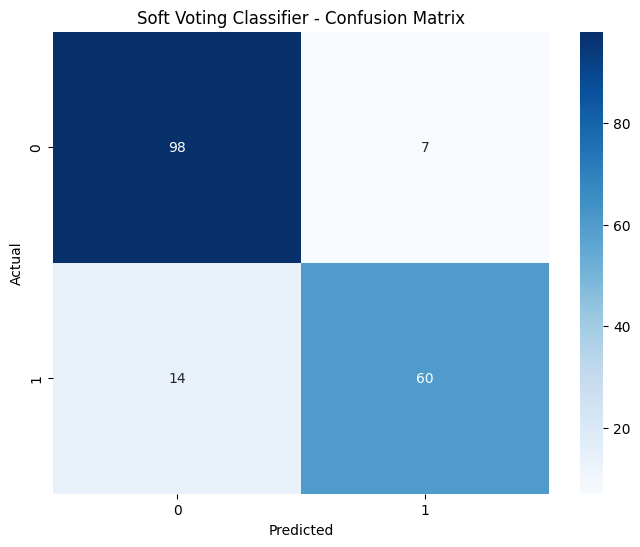

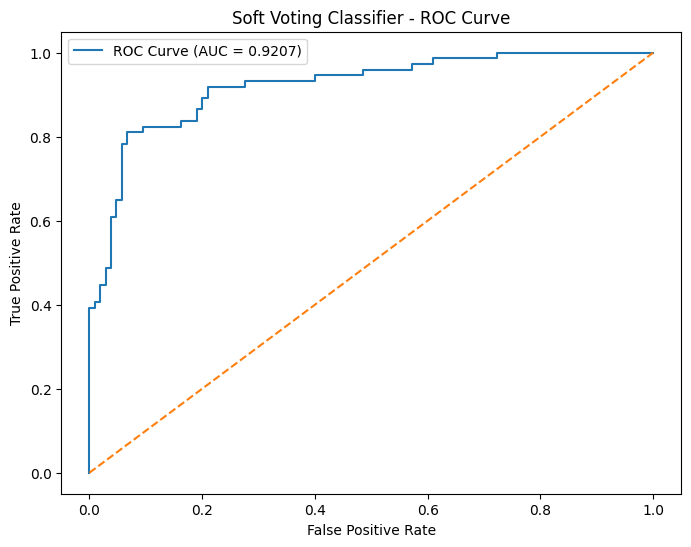

In [216]:
# Evaluation for Soft Voting Classifier
print("--- Soft Voting Classifier ---\n")

# Confusion Matrix
conf_matrix_soft = confusion_matrix(y_test, y_pred_soft)
print("Confusion Matrix:")
print(conf_matrix_soft)

# Classification Report
class_report_soft = classification_report(y_test, y_pred_soft)
print("\nClassification Report:")
print(class_report_soft)

# Calculate additional metrics
accuracy_soft = accuracy_score(y_test, y_pred_soft)
precision_soft = precision_score(y_test, y_pred_soft)
recall_soft = recall_score(y_test, y_pred_soft)
f1_soft = f1_score(y_test, y_pred_soft)
roc_auc_soft = roc_auc_score(y_test, voting_clf_soft.predict_proba(X_test_rfe)[:, 1])

print(f"\nAccuracy: {accuracy_soft:.4f}")
print(f"Precision: {precision_soft:.4f}")
print(f"Recall: {recall_soft:.4f}")
print(f"F1 Score: {f1_soft:.4f}")
print(f"ROC AUC Score: {roc_auc_soft:.4f}\n")

# Plot Confusion Matrix for Soft Voting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_soft, annot=True, fmt='d', cmap='Blues')
plt.title('Soft Voting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()

# Plot ROC Curve for Soft Voting
fpr_soft, tpr_soft, _ = roc_curve(y_test, voting_clf_soft.predict_proba(X_test_rfe)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_soft, tpr_soft, label=f'ROC Curve (AUC = {roc_auc_soft:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Soft Voting Classifier - ROC Curve')
plt.legend()
plt.show()

In [218]:
# Separate the predictor variables (features) from the target variable (Survived)
X = train_copy.drop('Survived', axis=1)
y = train_copy['Survived']

# Initialize the base model for RFE
base_model_for_rfe = GradientBoostingClassifier(random_state=42)

# Create the RFE object and select the top 15 features
rfe = RFE(estimator=base_model_for_rfe, n_features_to_select=15, step=1)
rfe.fit(X, y)

# Select the features chosen by RFE
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

# Update X to contain only the selected features
X_rfe = X[selected_features]

# Initialize the models and the Voting Classifier with soft voting
models = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

# Assign weights to the models, giving more weight to gradient boosting
weights = [1, 2.5, 1]

# Create and train the Voting Classifier with soft voting on the entire dataset
voting_clf_soft_full_train = VotingClassifier(estimators=models, voting='soft', weights=weights)
voting_clf_soft_full_train.fit(X_rfe, y)

# Apply the feature selection on the test set test_copy
test_copy_rfe = test_copy[selected_features]

# Make predictions on the entire test set
final_predictions = voting_clf_soft_full_train.predict(test_copy_rfe)

# Create a CSV file for submitting predictions to Kaggle
submission = pd.DataFrame({
    'PassengerId': test_copy['PassengerId'],  # Ensure that 'PassengerId' exists in test_copy
    'Survived': final_predictions
})

# Save the result
submission.to_csv('submission.csv', index=False)
print("Predictions have been saved to submission.csv")

# Download the predictions file
files.download('submission.csv')

Selected Features by RFE: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'FarePerPerson', 'Deck', 'Age*Class', 'Age*Fare',
       'CabinBool', 'TicketFreq'],
      dtype='object')
Predictions have been saved to submission.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------------------------------------
Save and download the cleaned train/test dataset to your local machine. Without/with being normalized with min-max.

In [219]:
# Save the cleaned train/test dataset to a CSV file
train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)

# train_copy.to_csv('train_copy_cleaned.csv', index=False)
# test_copy.to_csv('test_copy_cleaned.csv', index=False)

# Download the cleaned train/test file
files.download('train_cleaned.csv')
files.download('test_cleaned.csv')

# files.download('train_copy_cleaned.csv')
# files.download('test_copy_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------------------------------------------------------------------------------
Save and download the pretrained model to your local machine.

In [220]:
# Save the soft voting classifier to a file
joblib.dump(voting_clf_soft_full_train, 'soft_voting_classifier.pkl')
print("Model has been saved to soft_voting_classifier.pkl")

# Download the saved model file
files.download('soft_voting_classifier.pkl')

Model has been saved to soft_voting_classifier.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>